# 가설 (1) 소아청소년 인구밀도와 병원, 의원의 소아청소년과 위치는 관련이 있을 것이다

In [50]:
# 소아청소년 인구밀도 

In [51]:
import pandas as pd
import re

underage_population = pd.read_csv("../data/SMG_01_20221107_C_001.csv")

In [52]:
underage_population

,년도,행정구역읍면동코드,행정구역읍면동명,노인인구수,노인인구증감율,미성년자인구수,미성년자인구증감율,여자인구수,여자인구수증감율
0,2012,11,서울특별시,1105583,5.82,1972496,-3.32,5153982,-0.42
1,2012,11110,종로구,23730,4.08,28129,-5.33,82933,-1.80
2,2012,1111051500,청운효자동,2074,3.60,3344,-3.66,7826,-0.63
3,2012,1111053000,사직동,1602,2.96,1655,-2.36,5372,-1.41
4,2012,1111054000,삼청동,615,2.33,542,-3.21,1738,-1.92
...,...,...,...,...,...,...,...,...,...
4495,2021,1174065000,성내제2동,4355,3.32,2105,-9.70,11920,-3.71
4496,2021,1174066000,성내제3동,3844,3.92,2864,-6.53,11753,-1.17
4497,2021,1174068500,길동,7983,4.03,5142,-7.83,23354,-2.08
4498,2021,1174069000,둔촌제1동,38,-60.42,9,-10.00,58,-55.73


In [53]:
# 병원 + 소아청소년 인구밀도

In [54]:
# 서울시 병원, 의원 data 가져오기
hospital = pd.read_csv('../data/[필수활용01]서울시_병원정보.csv', encoding='cp949') # path 변경해야함
print(hospital.columns, '\n')

# 병원 종류 살펴보기
print(hospital['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", hospital['진료과목내용명'].isnull().sum(), '\n')

# 소아청소년과 병원 영업 상태 확인
pediatrics_hospital = hospital[(hospital['의료기관종별명'].isin(['병원', '한방병원', '종합병원'])) & (hospital['진료과목내용명'].str.contains('소아청소년과'))]
print(pediatrics_hospital['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 병원 정보만 남기기
pediatrics_hospital = pediatrics_hospital[pediatrics_hospital['상세영업상태명'] == '영업중']

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '시도', '도로명시도', '소재지시도'],
      dtype='object') 

병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 0 

영업중     123
폐업       29
휴업        1
직권폐업      1
Name: 상세영업상태명, dtype: int64 



In [55]:
# 년도가 2021인 underage_population 데이터만 선택
underage_population_2021 = underage_population[underage_population['년도'] == 2021]

In [56]:
underage_population_2021

,년도,행정구역읍면동코드,행정구역읍면동명,노인인구수,노인인구증감율,미성년자인구수,미성년자인구증감율,여자인구수,여자인구수증감율
4048,2021,11,서울특별시,1597447,2.33,1339819,-4.68,4891418,-1.52
4049,2021,11110,종로구,27609,-2.48,17365,-6.34,74500,-2.93
4050,2021,1111051500,청운효자동,2148,-3.68,1886,-5.32,6452,-3.01
4051,2021,1111053000,사직동,1754,-4.10,1233,-2.99,5172,-1.71
4052,2021,1111054000,삼청동,601,-7.82,273,-7.77,1288,-5.85
...,...,...,...,...,...,...,...,...,...
4495,2021,1174065000,성내제2동,4355,3.32,2105,-9.70,11920,-3.71
4496,2021,1174066000,성내제3동,3844,3.92,2864,-6.53,11753,-1.17
4497,2021,1174068500,길동,7983,4.03,5142,-7.83,23354,-2.08
4498,2021,1174069000,둔촌제1동,38,-60.42,9,-10.00,58,-55.73


In [57]:
def extract_dong_name(address):
    # 괄호 안의 내용 추출
    match = re.search(r'\(([^)]*동)\)', address)
    if match:
        return match.group(1)
    else:
        # 수정된 정규 표현식에서 일치하지 않으면 도로명주소에서 '동'을 찾아 반환
        match = re.search(r'\b(\S+동)\b', address)
        if match:
            return match.group(1)
        else:
            return None

# '행정구역읍면동명' 컬럼 추가
pediatrics_hospital['행정구역읍면동명'] = pediatrics_hospital['도로명전체주소'].apply(extract_dong_name)

In [58]:
dong_names = pediatrics_hospital['행정구역읍면동명'].unique()

def generalize_dong_name(dong_name):
    if dong_name is None:
        return ''
    # '제' 뒤의 숫자 제거
    modified_name = re.sub(r'제\d+', '', dong_name)
    # '동'으로 끝나는 경우 '동' 제거
    if modified_name.endswith('동'):
        modified_name = modified_name[:-1]
    return modified_name + "동"

# 일반화된 동 이름들을 저장할 리스트
generalized_dong_names = [generalize_dong_name(name) for name in dong_names]

print(generalized_dong_names)

['망우동', '면목동', '묵동', '여의도동', '대림동', '내곡동', '반포동', '방배동', '', '양재동', '사근동', '도선동', '자양동', '진관동', '논현동', '화곡동', '공릉동', '신림동', '평동', '북가좌동', '서초동', '신사동', '잠실동', '신수동', '청담동', '일원동', '삼성동', '도곡동', '역삼동', '중곡동', '화양동', '상계동', '길동', '하계동', '용두동', '장안동', '내발산동', '명일동', '둔촌동', '봉천동', '미아동', '쌍문동', '회기동', '휘경동', '청량리동', '등촌동', '도봉동', '창동', '상일동', '시흥동', '신정동', '신당동', '목동', '노량진동', '흑석동', '사당동', '신대방동', '상도동', '오류동', '구로동', '고척동', '개봉동', '하월곡동', '종암동', '풍납동', '가락동', '평창동', '숭인동', '연건동', '무악동', '역촌동', '한남동', '서계동', '응암동', '녹번동', '갈현동', '홍제동', '신길동', '북아현동', '신내동', '신촌동', '마곡동']


In [59]:
# 행정구역읍면동명이 결측치인 행 제거
pediatrics_hospital = pediatrics_hospital.dropna(subset=['행정구역읍면동명'])

In [60]:
# 일반화된 동 이름들을 저장할 리스트
generalized_dong_names = [generalize_dong_name(name) for name in dong_names]
print(generalized_dong_names)

['망우동', '면목동', '묵동', '여의도동', '대림동', '내곡동', '반포동', '방배동', '', '양재동', '사근동', '도선동', '자양동', '진관동', '논현동', '화곡동', '공릉동', '신림동', '평동', '북가좌동', '서초동', '신사동', '잠실동', '신수동', '청담동', '일원동', '삼성동', '도곡동', '역삼동', '중곡동', '화양동', '상계동', '길동', '하계동', '용두동', '장안동', '내발산동', '명일동', '둔촌동', '봉천동', '미아동', '쌍문동', '회기동', '휘경동', '청량리동', '등촌동', '도봉동', '창동', '상일동', '시흥동', '신정동', '신당동', '목동', '노량진동', '흑석동', '사당동', '신대방동', '상도동', '오류동', '구로동', '고척동', '개봉동', '하월곡동', '종암동', '풍납동', '가락동', '평창동', '숭인동', '연건동', '무악동', '역촌동', '한남동', '서계동', '응암동', '녹번동', '갈현동', '홍제동', '신길동', '북아현동', '신내동', '신촌동', '마곡동']


In [61]:
# 길이가 긴 순으로 정렬 (dong-name)
# for i in dong-name:
# 미성년자 인구수가 있는 데이터프레임의 dong-name: j
# 미성년자 인구수 - 테이블 
# 동을 뺀 두개를 비교했을 때 나머지에서 '망' '우' '동' 이 3글자에 해당하는게 다 있으면 변경, 행이 변경되었다고 테이블에 기록
# 이미 변경된건 변경 X 

# 동이름으로 더해주고 미성년자 인구수 구해서


In [62]:
# 1. '동' 이름을 길이가 긴 순으로 정렬
sorted_dong_names = sorted(generalized_dong_names, key=len, reverse=True)

sorted_dong_names = sorted_dong_names[:-1]

In [63]:
def campare(s1, s2):
    for s in s1:
        if s not in s2:
            return False
    return True

In [64]:
underage_population_2021

,년도,행정구역읍면동코드,행정구역읍면동명,노인인구수,노인인구증감율,미성년자인구수,미성년자인구증감율,여자인구수,여자인구수증감율
4048,2021,11,서울특별시,1597447,2.33,1339819,-4.68,4891418,-1.52
4049,2021,11110,종로구,27609,-2.48,17365,-6.34,74500,-2.93
4050,2021,1111051500,청운효자동,2148,-3.68,1886,-5.32,6452,-3.01
4051,2021,1111053000,사직동,1754,-4.10,1233,-2.99,5172,-1.71
4052,2021,1111054000,삼청동,601,-7.82,273,-7.77,1288,-5.85
...,...,...,...,...,...,...,...,...,...
4495,2021,1174065000,성내제2동,4355,3.32,2105,-9.70,11920,-3.71
4496,2021,1174066000,성내제3동,3844,3.92,2864,-6.53,11753,-1.17
4497,2021,1174068500,길동,7983,4.03,5142,-7.83,23354,-2.08
4498,2021,1174069000,둔촌제1동,38,-60.42,9,-10.00,58,-55.73


In [65]:
visited = [0] * len(underage_population_2021)
for i in sorted_dong_names:
    for j in range(len(underage_population_2021)):
        
        if visited[j]:
            continue
        
        if campare(i, underage_population_2021.iloc[j, 2]):
            underage_population_2021.iloc[j, 2] = i
            visited[j] = 1
        
        

In [66]:
underage_population_2021.to_csv('underage_population_2021.csv', index=False)

In [67]:
underage_population_2021 = underage_population_2021.groupby('행정구역읍면동명')['미성년자인구수'].sum().reset_index()


In [68]:
underage_population_2021

,행정구역읍면동명,미성년자인구수
0,가락동,14554
1,가리봉동,510
2,가산동,1301
3,가양제1동,3363
4,가양제2동,884
...,...,...
317,회기동,1059
318,회현동,389
319,후암동,2052
320,휘경동,4687


In [69]:
# 행정구역읍면동명이 결측치인 행 제거
pediatrics_hospital = pediatrics_hospital.dropna(subset=['행정구역읍면동명'])

In [70]:
# 두 데이터프레임을 행정구역읍면동명을 기준으로 병합
df = pd.merge(pediatrics_hospital, underage_population_2021, how='left', left_on='행정구역읍면동명', right_on='행정구역읍면동명')

In [71]:
df

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,구급차일반,총인원,구조사수,허가병상수,최초지정일자,시도,도로명시도,소재지시도,행정구역읍면동명,미성년자인구수
0,2770,병원,01_01_01_P,3060000,PHMA219833060034021200004,1983-08-22,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,망우동,5620.0
1,2772,병원,01_01_01_P,3060000,PHMA220023060034021200020,2002-10-25,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,망우동,5620.0
2,2773,병원,01_01_01_P,3060000,PHMA220033060034021200027,1900-01-01,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,면목동,14899.0
3,2775,병원,01_01_01_P,3060000,PHMA220083060034021200008,2008-04-04,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,묵동,7218.0
4,2777,병원,01_01_01_P,3060000,PHMA220083060034021200023,2008-09-01,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,망우동,5620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,6734,병원,01_01_01_P,3110000,PHMA220063110032021200002,2006-08-07,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,갈현동,6001.0
114,6739,병원,01_01_01_P,3120000,PHMA218853120033021200001,1974-03-25,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,신촌동,1555.0
115,6753,병원,01_01_01_P,3150000,PHMA220183150037021200002,2018-12-26,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,마곡동,NaN
116,6821,병원,01_01_01_P,3050000,PHMA220223050034021200001,2022-05-26,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,장안동,10444.0


In [72]:
df = df.dropna(subset=['미성년자인구수'])

In [73]:
df

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,구급차일반,총인원,구조사수,허가병상수,최초지정일자,시도,도로명시도,소재지시도,행정구역읍면동명,미성년자인구수
0,2770,병원,01_01_01_P,3060000,PHMA219833060034021200004,1983-08-22,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,망우동,5620.0
1,2772,병원,01_01_01_P,3060000,PHMA220023060034021200020,2002-10-25,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,망우동,5620.0
2,2773,병원,01_01_01_P,3060000,PHMA220033060034021200027,1900-01-01,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,면목동,14899.0
3,2775,병원,01_01_01_P,3060000,PHMA220083060034021200008,2008-04-04,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,묵동,7218.0
4,2777,병원,01_01_01_P,3060000,PHMA220083060034021200023,2008-09-01,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,망우동,5620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,6716,병원,01_01_01_P,3060000,PHMA220053060034021200006,2005-03-29,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,묵동,7218.0
112,6719,병원,01_01_01_P,3060000,PHMA220113060034021200001,2011-03-09,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,신내동,9485.0
113,6734,병원,01_01_01_P,3110000,PHMA220063110032021200002,2006-08-07,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,갈현동,6001.0
114,6739,병원,01_01_01_P,3120000,PHMA218853120033021200001,1974-03-25,NaN,1,영업/정상,13,...,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,신촌동,1555.0


## a. 미성년자 인구 EDA

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [75]:
mpl.rcParams['font.family'] = 'AppleGothic'

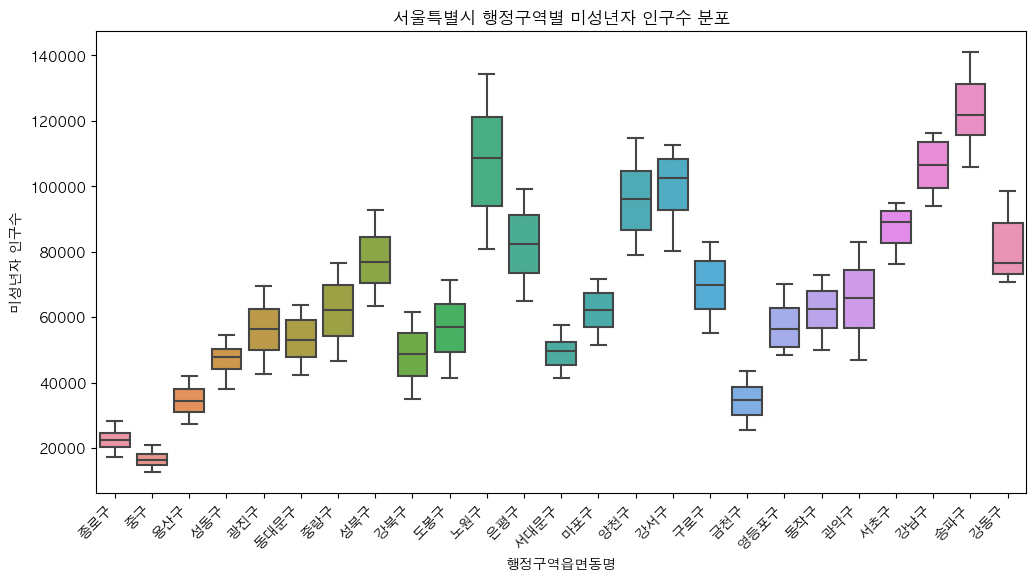

In [76]:
# 서울특별시의 행정구역을 뽑기
seoul_df = underage_population[underage_population['행정구역읍면동명'].str.match('.*구$')]

# 서울 행정구역의 미성년자 인구수에 대한 EDA
plt.figure(figsize=(12, 6))
sns.boxplot(x='행정구역읍면동명', y='미성년자인구수', data=seoul_df)
plt.title('서울특별시 행정구역별 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 서울 행정구역의 미성년자 인구수 통계 정보
seoul_summary = seoul_df.groupby('행정구역읍면동명')['미성년자인구수'].describe()

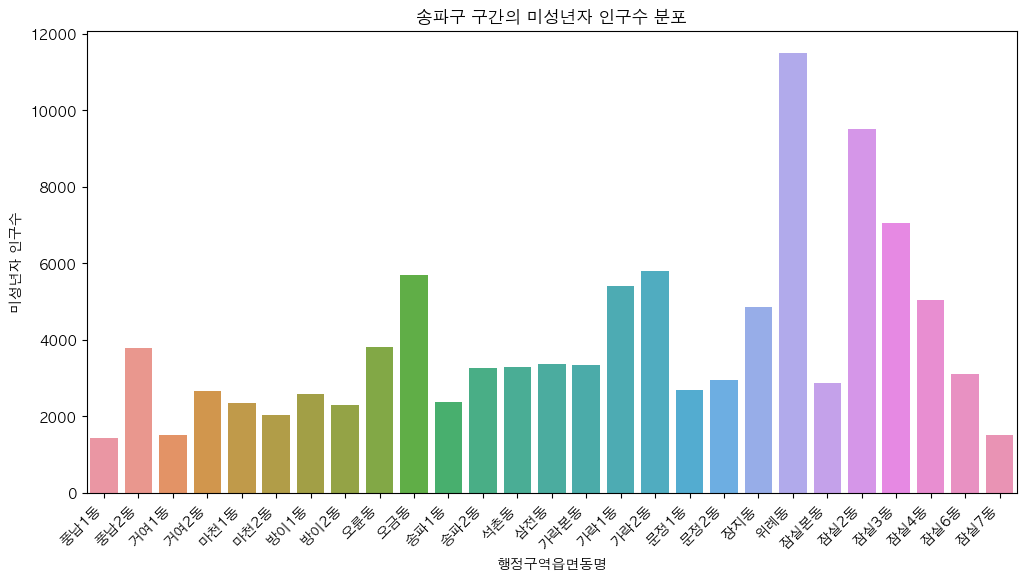

          count     mean  std      min      25%      50%      75%      max
행정구역읍면동명                                                                  
가락1동        1.0   5410.0  NaN   5410.0   5410.0   5410.0   5410.0   5410.0
가락2동        1.0   5809.0  NaN   5809.0   5809.0   5809.0   5809.0   5809.0
가락본동        1.0   3335.0  NaN   3335.0   3335.0   3335.0   3335.0   3335.0
거여1동        1.0   1507.0  NaN   1507.0   1507.0   1507.0   1507.0   1507.0
거여2동        1.0   2669.0  NaN   2669.0   2669.0   2669.0   2669.0   2669.0
마천1동        1.0   2344.0  NaN   2344.0   2344.0   2344.0   2344.0   2344.0
마천2동        1.0   2022.0  NaN   2022.0   2022.0   2022.0   2022.0   2022.0
문정1동        1.0   2678.0  NaN   2678.0   2678.0   2678.0   2678.0   2678.0
문정2동        1.0   2939.0  NaN   2939.0   2939.0   2939.0   2939.0   2939.0
방이1동        1.0   2571.0  NaN   2571.0   2571.0   2571.0   2571.0   2571.0
방이2동        1.0   2295.0  NaN   2295.0   2295.0   2295.0   2295.0   2295.0
삼전동         1.0   3353.0 

In [77]:
# 송파구 
indices1 = underage_population[underage_population['행정구역읍면동명'] == '송파구'].index
indices2 = underage_population[underage_population['행정구역읍면동명'] == '강동구'].index

first = indices1[-1]+1
last = indices2[-1] -1
subset = underage_population.loc[first:last]

# 송파구 구간에 대한 EDA
plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=subset)
plt.title('송파구 구간의 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 통계 정보
summary = subset.groupby('행정구역읍면동명')['미성년자인구수'].describe()
print(summary)

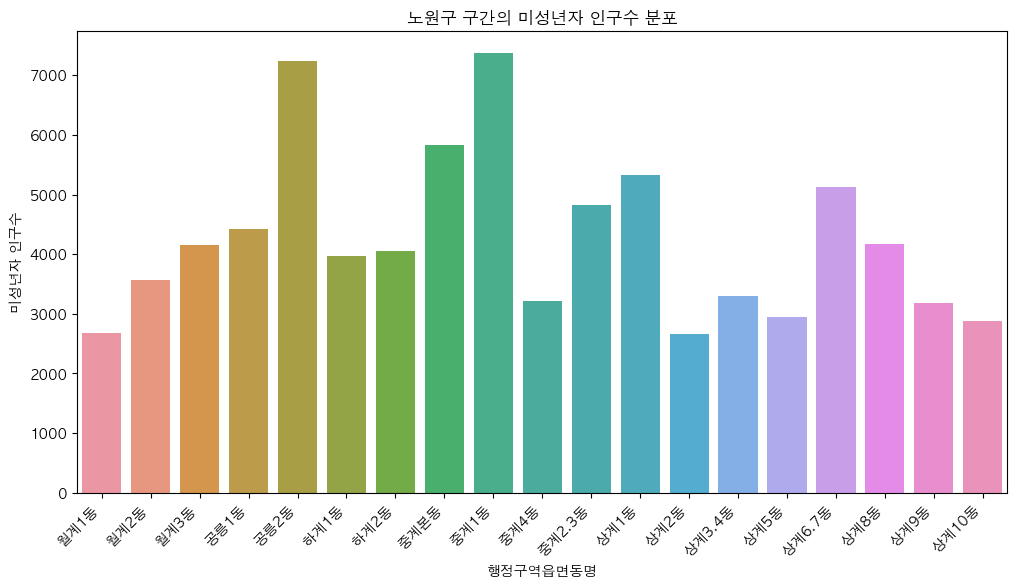

          count    mean  std     min     25%     50%     75%     max
행정구역읍면동명                                                            
공릉1동        1.0  4419.0  NaN  4419.0  4419.0  4419.0  4419.0  4419.0
공릉2동        1.0  7237.0  NaN  7237.0  7237.0  7237.0  7237.0  7237.0
상계10동       1.0  2885.0  NaN  2885.0  2885.0  2885.0  2885.0  2885.0
상계1동        1.0  5335.0  NaN  5335.0  5335.0  5335.0  5335.0  5335.0
상계2동        1.0  2665.0  NaN  2665.0  2665.0  2665.0  2665.0  2665.0
상계3.4동      1.0  3291.0  NaN  3291.0  3291.0  3291.0  3291.0  3291.0
상계5동        1.0  2952.0  NaN  2952.0  2952.0  2952.0  2952.0  2952.0
상계6.7동      1.0  5133.0  NaN  5133.0  5133.0  5133.0  5133.0  5133.0
상계8동        1.0  4167.0  NaN  4167.0  4167.0  4167.0  4167.0  4167.0
상계9동        1.0  3187.0  NaN  3187.0  3187.0  3187.0  3187.0  3187.0
월계1동        1.0  2685.0  NaN  2685.0  2685.0  2685.0  2685.0  2685.0
월계2동        1.0  3573.0  NaN  3573.0  3573.0  3573.0  3573.0  3573.0
월계3동        1.0  4152.0  NaN  4152

In [78]:
# 노원구 
indices1 = underage_population[underage_population['행정구역읍면동명'] == '노원구'].index
indices2 = underage_population[underage_population['행정구역읍면동명'] == '은평구'].index

first = indices1[-1]+1
last = indices2[-1] -1
subset = underage_population.loc[first:last]

# 노원구 구간에 대한 EDA
plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=subset)
plt.title('노원구 구간의 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 통계 정보
summary = subset.groupby('행정구역읍면동명')['미성년자인구수'].describe()
print(summary)

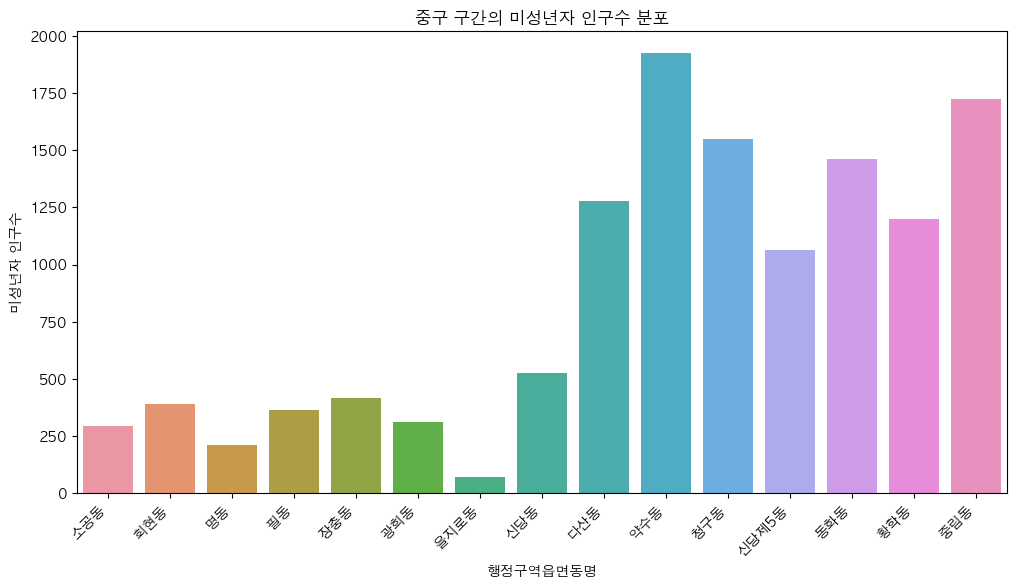

          count    mean  std     min     25%     50%     75%     max
행정구역읍면동명                                                            
광희동         1.0   311.0  NaN   311.0   311.0   311.0   311.0   311.0
다산동         1.0  1278.0  NaN  1278.0  1278.0  1278.0  1278.0  1278.0
동화동         1.0  1461.0  NaN  1461.0  1461.0  1461.0  1461.0  1461.0
명동          1.0   209.0  NaN   209.0   209.0   209.0   209.0   209.0
소공동         1.0   294.0  NaN   294.0   294.0   294.0   294.0   294.0
신당동         1.0   525.0  NaN   525.0   525.0   525.0   525.0   525.0
신당제5동       1.0  1062.0  NaN  1062.0  1062.0  1062.0  1062.0  1062.0
약수동         1.0  1927.0  NaN  1927.0  1927.0  1927.0  1927.0  1927.0
을지로동        1.0    68.0  NaN    68.0    68.0    68.0    68.0    68.0
장충동         1.0   417.0  NaN   417.0   417.0   417.0   417.0   417.0
중림동         1.0  1723.0  NaN  1723.0  1723.0  1723.0  1723.0  1723.0
청구동         1.0  1548.0  NaN  1548.0  1548.0  1548.0  1548.0  1548.0
필동          1.0   363.0  NaN   363

In [79]:
# 중구 
indices1 = underage_population[underage_population['행정구역읍면동명'] == '중구'].index
indices2 = underage_population[underage_population['행정구역읍면동명'] == '용산구'].index

first = indices1[-1]+1
last = indices2[-1] -1
subset = underage_population.loc[first:last]

# 중구 구간에 대한 EDA
plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=subset)
plt.title('중구 구간의 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 통계 정보
summary = subset.groupby('행정구역읍면동명')['미성년자인구수'].describe()
print(summary)

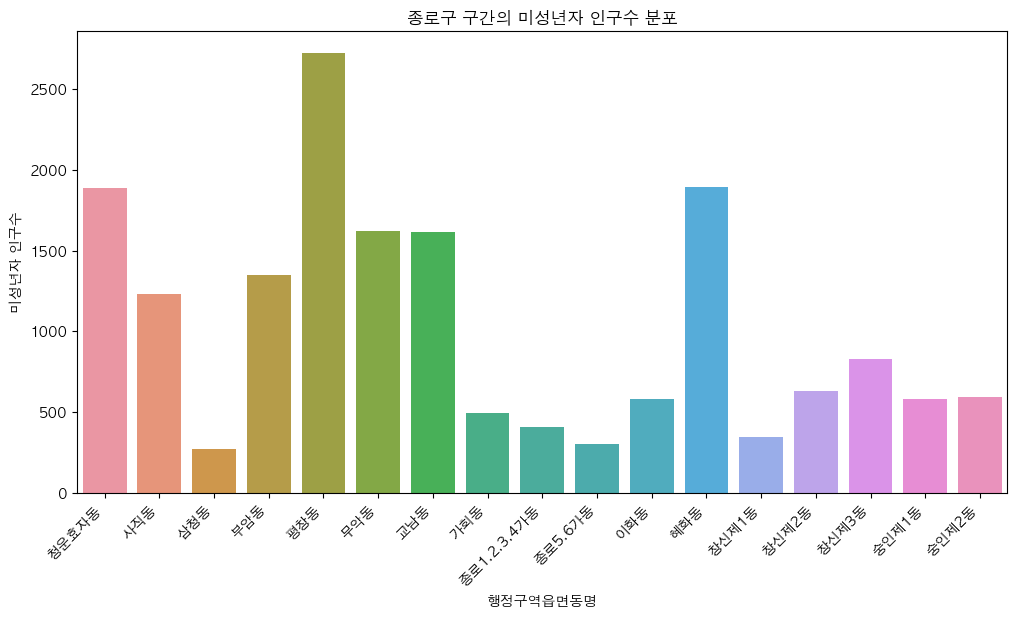

             count    mean  std     min     25%     50%     75%     max
행정구역읍면동명                                                               
가회동            1.0   491.0  NaN   491.0   491.0   491.0   491.0   491.0
교남동            1.0  1614.0  NaN  1614.0  1614.0  1614.0  1614.0  1614.0
무악동            1.0  1621.0  NaN  1621.0  1621.0  1621.0  1621.0  1621.0
부암동            1.0  1351.0  NaN  1351.0  1351.0  1351.0  1351.0  1351.0
사직동            1.0  1233.0  NaN  1233.0  1233.0  1233.0  1233.0  1233.0
삼청동            1.0   273.0  NaN   273.0   273.0   273.0   273.0   273.0
숭인제1동          1.0   583.0  NaN   583.0   583.0   583.0   583.0   583.0
숭인제2동          1.0   591.0  NaN   591.0   591.0   591.0   591.0   591.0
이화동            1.0   582.0  NaN   582.0   582.0   582.0   582.0   582.0
종로1.2.3.4가동    1.0   410.0  NaN   410.0   410.0   410.0   410.0   410.0
종로5.6가동        1.0   304.0  NaN   304.0   304.0   304.0   304.0   304.0
창신제1동          1.0   345.0  NaN   345.0   345.0   345.0   345.0 

In [80]:
# 종로구 
indices1 = underage_population[underage_population['행정구역읍면동명'] == '종로구'].index
indices2 = underage_population[underage_population['행정구역읍면동명'] == '중구'].index

first = indices1[-1]+1
last = indices2[-1] -1
subset = underage_population.loc[first:last]

# 중구 구간에 대한 EDA
plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=subset)
plt.title('종로구 구간의 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 통계 정보
summary = subset.groupby('행정구역읍면동명')['미성년자인구수'].describe()
print(summary)

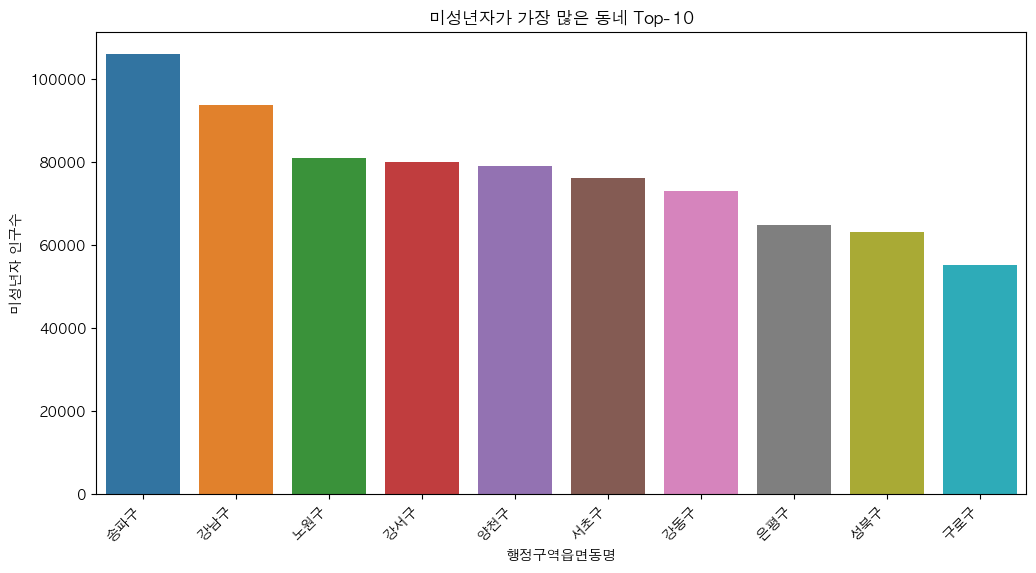

In [81]:
# 미성년자가 가장 많은 동네 Top-10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '서울특별시' 행 제외
filtered_df = underage_population_2021[underage_population_2021['행정구역읍면동명'] != '서울특별시']

# '미성년자인구수' 기준으로 내림차순 정렬하고, 상위 10개 동네 선택
top_10_dong = filtered_df.sort_values(by='미성년자인구수', ascending=False).head(10)

# Boxplot 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=top_10_dong)
plt.title('미성년자가 가장 많은 동네 Top-10')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()


## c. 가설검정: 소아청소년 인구밀도와 병원, 의원의 소아청소년과 위치는 관련이 있을 것이다

In [82]:
# x: 미성년자인구수 y: 

# 동, 미성년자인구수, 병원수, 의원수 

In [83]:
# 의원 + 소아청소년 인구밀도

In [84]:
# 가설 검정 